# TCS iON RIO-125: Forecasting System - Project Demand of Products at a Retail Outlet Based on Historical Data

Prepared by: Appurva Shripad Talashilkar

Dataset Link: https://raw.githubusercontent.com/AT270600/Tcs-Project/main/tcsforecastingproject.csv

# Importing libraries & dataset:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm, skew 
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AT270600/Tcs-Project/main/tcsforecastingproject.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.groupby(['item'])['sales'].sum()

item
1      401384
2     1069564
3      669087
4      401907
5      335230
6     1068281
7     1068777
8     1405108
9      938379
10    1337133
11    1271925
12    1271534
13    1539621
14    1071531
15    1607442
16     468480
17     602486
18    1538876
19     736892
20     867641
21     736190
22    1469971
23     534979
24    1205975
25    1473334
26     869981
27     402628
28    1604713
29    1271240
30     736554
31    1070845
32     803107
33    1270183
34     469935
35    1201541
36    1406548
37     534258
38    1470330
39     801311
40     534094
41     401759
42     669925
43     936635
44     536811
45    1471467
46    1070764
47     401781
48     937703
49     535663
50    1203009
Name: sales, dtype: int64

In [4]:
df.shape

(913000, 4)

In [5]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [6]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


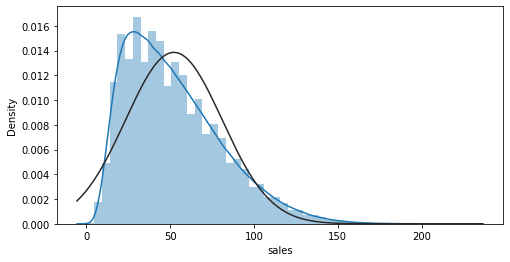

In [7]:
#Lets check the ditribution of the target variable (Order_Demand)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8,4

sns.distplot(df['sales'], fit=norm)

# Univariate Analysis

In [8]:
df['item'].value_counts().sort_values(ascending=False)

1     18260
12    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
13    18260
38    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
25    18260
26    18260
27    18260
49    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
50    18260
Name: item, dtype: int64

In [9]:
df = df[['date', 'sales']]
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [10]:
df['date']=pd.to_datetime(df.date)

In [11]:
df.set_index('date', inplace=True)

In [12]:
df.head(13)

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
2013-01-06,12
2013-01-07,10
2013-01-08,9
2013-01-09,12


In [13]:
df.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   sales   913000 non-null  int64
dtypes: int64(1)
memory usage: 13.9 MB


In [15]:
df.describe()

,sales
count,913000.000000
mean,52.250287
std,28.801144
min,0.000000
25%,30.000000
50%,47.000000
75%,70.000000
max,231.000000


# Resampling of data

In [16]:
df=df.resample('M').sum()
df.head(13)

,sales
date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242
2013-06-30,795597
2013-07-31,855922
2013-08-31,766761
2013-09-30,689907


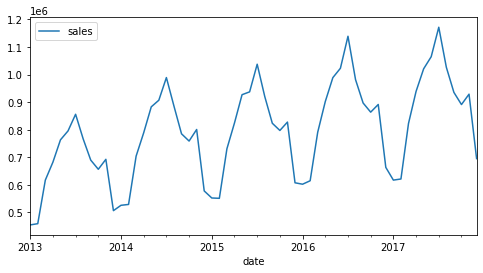

In [17]:
df.plot()

# EDA

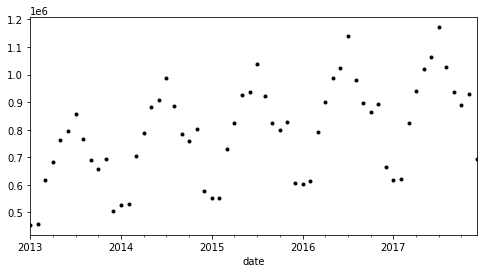

In [18]:
#dotted plot
df['sales'].plot(style='k.')
plt.show()

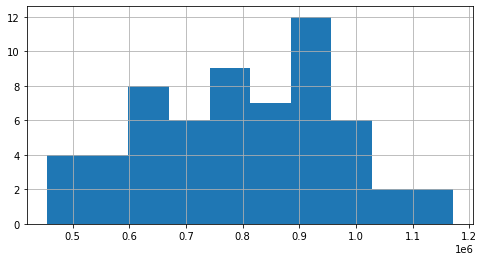

In [19]:
#histogram 
df['sales'].hist()
plt.show()

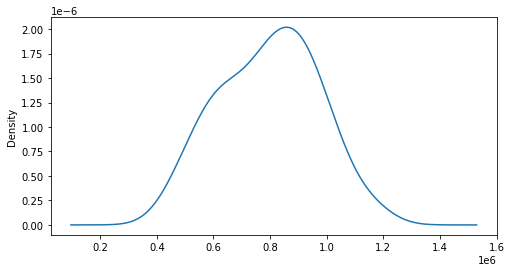

In [20]:
#kernel density plot
df['sales'].plot(kind='kde')
plt.show()

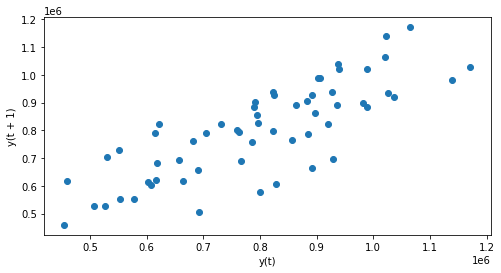

In [21]:
#lag plot: used to check if the series is random or not.
from pandas.plotting import lag_plot
lag_plot(df['sales'])

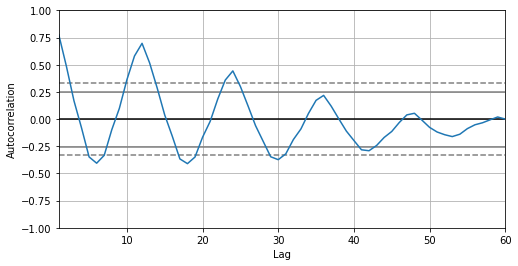

In [22]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])

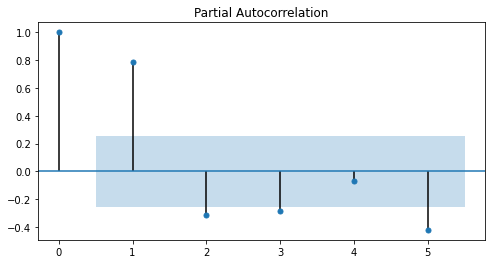

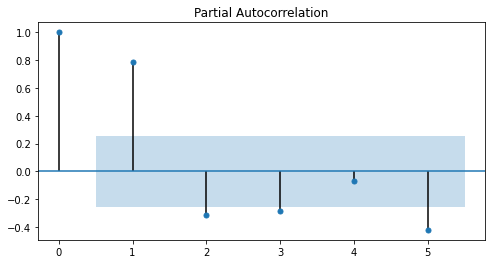

In [23]:
#Partial Autocorrelation
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

#pacf
plot_pacf(df['sales'], lags=5)

# Checking whether data is stationary

### ADFULLER TEST

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(df['sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.247518850016353
p-value: 7.026495391574688e-06
Critical Values:
	1%: -3.5745892596209488
	5%: -2.9239543084490744
	10%: -2.6000391840277777


Since ADF statistic is close to the critical values & p-value is less than threshold(0.05).
Thus,we conclude time series is stationary.

### Rolling mean test:

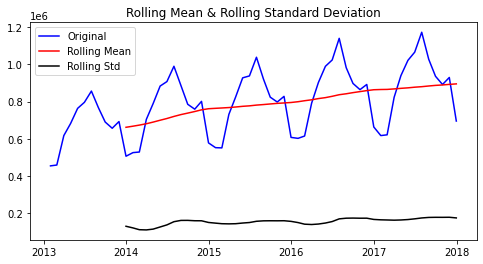

In [26]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

  The rolling mean and standard deviation are approximately horizontal.
  Time series is stationary.

# SARIMAX

In [27]:
ts2=sm.tsa.statespace.SARIMAX(df.sales,order=(1,1,1),seasonal_order=(1,1,1,12), enforce_invertibility=False, enforce_stationarity=False)
model2=ts2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


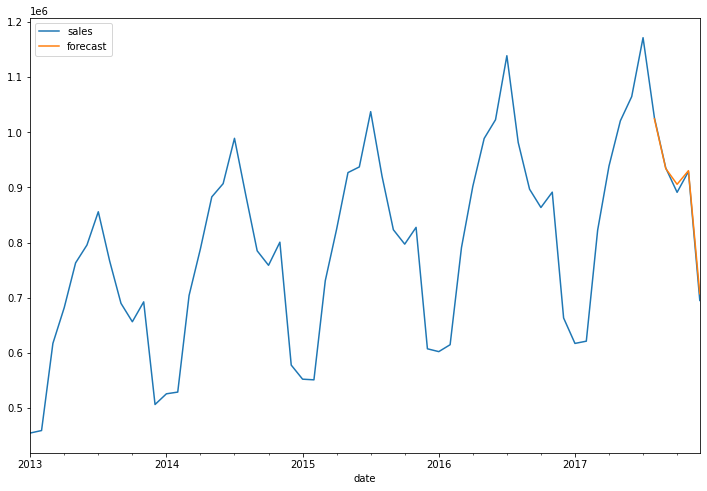

In [28]:
df['forecast']=model2.predict(start=55,end=75,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

Here in the graph, we can see the results: the forecasting line is almost lying on the given values for this model. We didn’t even require the differencing method. Using this model now, we can predict the future values too. 

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -623.752
Date:                            Tue, 15 Nov 2022   AIC                           1257.503
Time:                                    11:15:29   BIC                           1264.986
Sample:                                01-31-2013   HQIC                          1260.021
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0119   3.96e-26  -2.56e+25      0.000      -1.012      -1.012
ma.L1          0.8282   4.87e-26    1.7e+25      0.000       0.828       0.828
ar.S.L12      -0.1692   3.96e-27  -4.27e+25      0.000      -0.169      -0.169
ma.S.L12    1.212e+14   5.17e-33   2.34e+46      0.000    1.21e+14    1.21e+14
sigma2      2.836e-13    3.3e-10      0.001      0.999   -6.47e-10    6.48e-10
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):                 2.93
Prob(Q):                              0.08   Prob(JB):                         0.23
Heteroskedasticity (H):               0.63   Skew:                            -0.66
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

# FUTURE FORECAST

In [30]:
from pandas.tseries.offsets import DateOffset
futuredates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [31]:
futuredatedf=pd.DataFrame(index=futuredates[1:], columns=df.columns)

In [32]:
futuredatedf.tail()

,sales,forecast
2019-07-31,NaN,NaN
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [33]:
future=pd.concat([df,futuredatedf])

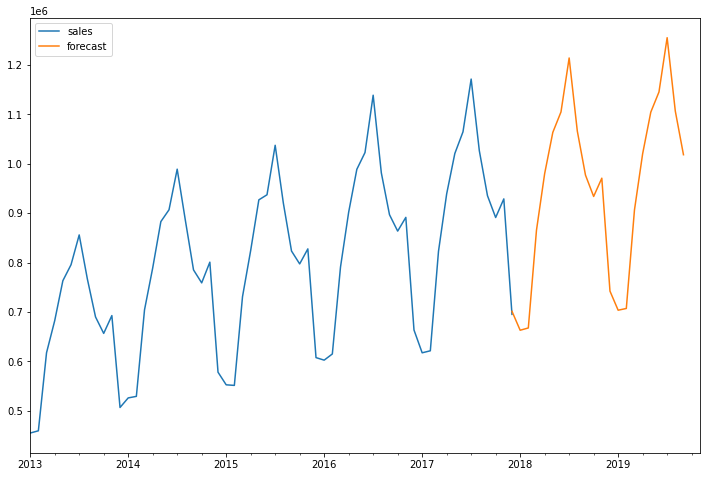

In [34]:
future['forecast']=model2.predict(start=59,end=80,dynamic=True)
future[['sales','forecast']].plot(figsize=(12,8))

# Thank you!